In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,False,New hyperparams


In [3]:
run_orig = RunManager('StatArbStrategy', 'run_0070', test_periods=0)
run_updated = RunManager('StatArbStrategy', 'run_0081', test_periods=0)

In [4]:
run_orig.import_return_frame()
run_updated.import_return_frame()

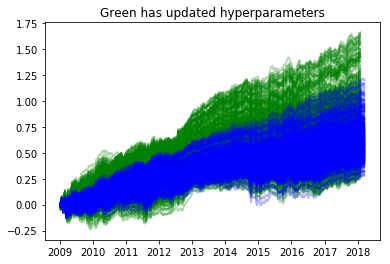

In [5]:
plt.figure()
plt.plot(run_updated.returns.cumsum(), 'g', alpha=0.3)
plt.plot(run_orig.returns.cumsum(), 'b', alpha=0.3)
plt.title('Green has updated hyperparameters')
plt.show()

In [6]:
run_updated.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,330,0.724455,0.056381,-999.0
1,holding_period,5,330,0.766064,0.064364,-999.0
2,holding_period,7,330,0.743372,0.066513,-999.0
3,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",198,0.731437,0.062211,-999.0
4,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",198,0.762361,0.064613,-999.0
5,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",198,0.797678,0.067932,-999.0
6,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",198,0.813640,0.068048,-999.0
7,model,{u'type': u'reg'},198,0.618036,0.049293,-999.0
8,per_side_count,10,330,0.758509,0.063799,-999.0
9,per_side_count,20,330,0.648352,0.070184,-999.0


# Combo Search for both

In [7]:
CombinationSearch().params

{'training_epochs': 1, 'training_freq': 'm', 'training_periods': 12}

In [13]:
comb1 = CombinationSearch()
comb1.add_run(run_orig)
comb1.params['training_epochs'] = 10
comb1.start()

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 10/10 [02:14<00:00, 13.45s/it]


In [14]:
comb2 = CombinationSearch()
comb2.add_run(run_updated)
comb1.params['training_epochs'] = 10
comb2.start()

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 10/10 [02:15<00:00, 13.39s/it]


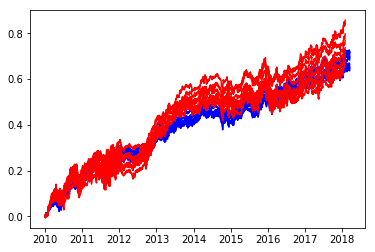

In [15]:
plt.figure()
plt.plot(comb1.best_results_returns.cumsum(), 'b')
plt.plot(comb2.best_results_returns.cumsum(), 'r')
plt.show()

In [19]:
# ORIGINAL - Average across all models
df = rollup_returns(comb1.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.065159,0.007762,0.072423,0.011692,0.157037
2011,0.048559,0.011105,-0.006917,0.073461,0.126208
2012,-0.014271,0.001713,0.016120,0.058796,0.062358
2013,0.004155,0.039909,0.025107,0.005271,0.074442
2014,0.050084,-0.015116,-0.019675,0.003840,0.019133
2015,0.020977,0.029616,-0.017638,0.070065,0.103019
2016,-0.011501,0.018882,0.012285,0.035560,0.055226
2017,0.018391,0.021375,-0.006306,0.021900,0.055360


In [20]:
df.mean()

Qtr
1     0.023243
2     0.014406
3     0.009425
4     0.035073
yr    0.075602
dtype: float64

In [21]:
# UPDATED - Average across all models
df = rollup_returns(comb2.best_results_returns.mean(axis=1).to_frame())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.087551,-0.002775,0.095795,-0.010918,0.169653
2011,0.035150,0.030034,-0.033082,0.058445,0.090546
2012,-0.011484,0.003669,0.016862,0.107476,0.116523
2013,0.018566,0.057757,0.043790,-0.014652,0.105460
2014,0.039467,0.006860,-0.021828,0.013291,0.037789
2015,-0.013097,0.051968,-0.033745,0.058791,0.063917
2016,-0.010013,-0.014563,0.000144,0.053556,0.029124
2017,0.024897,0.033348,-0.001860,0.028391,0.084776


In [22]:
df.mean()

Qtr
1     0.024304
2     0.020787
3     0.008259
4     0.036797
yr    0.082832
dtype: float64